In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
/*================================================================
*   Copyright (C) 2018. All rights reserved.
*   Author：Leon Wang
*   Date：Sun Jul 29 22:36:06 2018
*   Email：leonwang@bu.edu
*   Description： Implement Bootstrapping Method of ESL
================================================================*/
"""
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
x, y = make_regression(n_features=100, n_informative=1,random_state=0, shuffle=False)
n_trees=2

l=np.column_stack((x,y))
l=pd.DataFrame(l)

def df_to_array(datasample):
    """
      Function to transform dataframe to array
      :param datasample: np.array or pd.DataFrame of shape (num of train obs, num_of_featues+1)
      :return np.array datatype
    """
    return np.array(datasample)
  

def bootstrapping(datasample):
    """
      Function to return the data set after bootstrapping with replacement
      :param datasample: np.array or pd.DataFrame of shape (num of train obs, num_of_featues+1)
      :return bootstrapping selected indexs and bootstrapping not selected indexs
    """
    
    datasample=df_to_array(datasample)
    
    boots_indexs=np.random.randint(len(datasample),size=(1,len(datasample)))
    
    whole_indexs=list(range(len(datasample)))
    
    missing_indexs=np.array(list(set(whole_indexs).difference(set(list(boots_indexs[0])))))
    
    
    return boots_indexs,missing_indexs


def Model_Train(datasample):
    """
      Temporary Function that needs to be replaced with the ML algorithm
      :param datasample: np.array or pd.DataFrame of shape (num of train obs, num_of_featues+1)
      :return trained ML kernal, can be used for predict
    """
    datasample=df_to_array(datasample)
    train_features=datasample[:,:-1]
    train_labels=datasample[:,-1]
    rf = RandomForestRegressor(n_estimators= n_trees)
    rf.fit(train_features,train_labels)
    return rf
    

def calc_error(datasample,boots_num):
    """
      Function to return the boostrapped out-of-sample error 
      :param datasample: np.array or pd.DataFrame of shape (num of train obs, num_of_featues+1)
      :param boots_num: number of bootstrapped sample needed
      :return estimated error, a single number
    """
    mse_list=[]
    datasample=df_to_array(datasample)
    for i in range(boots_num):
        boots_indexs,missing_indexs=bootstrapping(datasample)
        
        boostrapped_data=datasample[boots_indexs][0]
        
        boots_outsample_data=datasample[missing_indexs]
        

        # Train the model 
        rf_kernal=Model_Train(boostrapped_data)
        
        # Test the model
        test_features=boots_outsample_data[:,:-1]
        test_labels=boots_outsample_data[:,-1]
        pred=rf_kernal.predict(test_features)
        
        
        # Can change to MAE, MSE
        
        me=np.mean(pred-test_labels)
        #mse=np.mean((pred-train_labels)**2)
        #mae=np.mean(np.abs(pred-train_labels))
        
        mse_list.append(me)
    print('Estimated Out of Sample Error=%f'%(np.mean(mse_list)))
    return np.mean(mse_list)


Estimated Out of Sample Error=-0.014423
Average value of y label is -0.647507


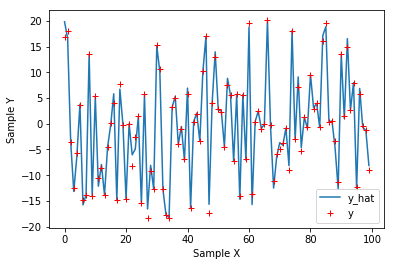

In [3]:
calc_error(l,1000)

l=df_to_array(l)
rf_kernal=Model_Train(l)
y_hat=rf_kernal.predict(l[:,:-1])
y=l[:,-1]
print('Average value of y label is %f' %(np.mean(y)))
import matplotlib.pyplot as plt
plt.plot(y_hat,label="y_hat")
plt.plot(y,'r+',label='y')
plt.xlabel('Sample X')
plt.ylabel('Sample Y')
plt.legend()
plt.show()
